
### Project 1: Write a Data Scientist Blog Post

This Jupyter notebook will analyse the StackOverflow data from 2011 to 2020 to indentify some tendencies in software developper career satisfaction in the last years. 

First of all, the data are read from csv files.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Read csv files
PathName = "./Dataset/"
FileNames = ["2011 Stack Overflow Survey Results",
             "2012 Stack Overflow Survey Results",
             "2013 Stack Overflow Survey Responses",
             "2014 Stack Overflow Survey Responses",
             "2015 Stack Overflow Developer Survey Responses",
             "2016 Stack Overflow Survey Responses",
             "survey_results_public_2017",
             "survey_results_public_2018",
            "survey_results_public_2019",
            "survey_results_public_2020"]


In [4]:
years = np.linspace(2011,2020,2020-2011+1,dtype = 'int') # List with all the years under analysis

Education_field = ['',
                   '',
                   '',
                   '',
                   '',
                   '',
                   'FormalEducation',
                   'FormalEducation',
                   'UndergradMajor',
                   'EdLevel']

Language_field = ['Which languages are you proficient in?',
                   'Which languages are you proficient in?',
                   'Which of the following languages or technologies have you used significantly in the past year?',
                   'Which of the following languages or technologies have you used significantly in the past year?',
                   'Select all that apply.1',
                   '',
                   'HaveWorkedLanguage',
                   'LanguageWorkedWith',
                   'LanguageWorkedWith',
                   'LanguageWorkedWith']
work_remotely = ['',
                '',
                '',
                'Do you work remotely?',
                '',
                '',
                'HomeRemote',
                '',
                'WorkRemote',
                '']

Evaluate the evolution in the last years on programming language usage.

In [127]:
def show_top_five_programming_languages(language,year,show_results = False):
    print('Parse language field...')
    
    # Drop empty lines
    language = language.dropna(axis = 0)
    
    # Identify the type of languages used in a year
    All_languages = []
    for sublist in language.str.split(";",expand=False).values.tolist():
        for item in sublist:
            All_languages.append(item.replace(" ", ""))

    language_type = list(set(All_languages)) # Select unique type of languages

    # Calculate the frequency of each type of language
    language_frequency =[]
    for language_type_ in range(len(language_type)):
        language_frequency.append(All_languages.count(language_type[language_type_]))


    # Sort in decreasing order the most used programming language
    index_sort = np.argsort(language_frequency)
    index_sort
    language_type_sorted = []
    language_frequency_sorted = []
    for index in index_sort:
        language_type_sorted.append(language_type[index])
        language_frequency_sorted.append(language_frequency[index])

    # Show frequency bar for the top 5
    if show_results:
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        ax.bar(language_type_sorted[-5:],language_frequency_sorted[-5:])
        plt.title('The five most popular programming language in ' + str(year))
        plt.show()
    return language

------------------------------------------------------------------------
Year 2011
Reading csv file ': ./Dataset/2011 Stack Overflow Survey Results.csv ...
Analysing field Which languages are you proficient in?...
Parse language field...


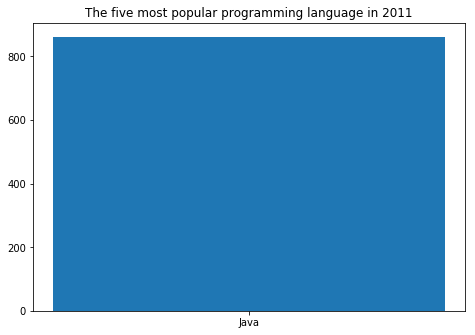

------------------------------------------------------------------------
Year 2012
Reading csv file ': ./Dataset/2012 Stack Overflow Survey Results.csv ...
Analysing field Which languages are you proficient in?...
Parse language field...


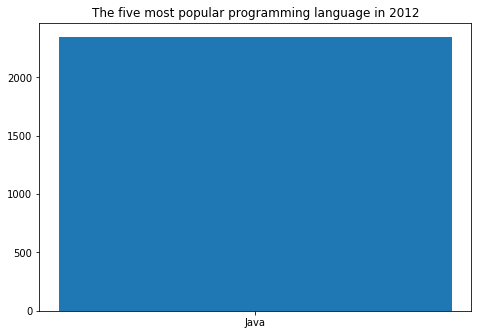

------------------------------------------------------------------------
Year 2013
Reading csv file ': ./Dataset/2013 Stack Overflow Survey Responses.csv ...
Analysing field Which of the following languages or technologies have you used significantly in the past year?...
Parse language field...


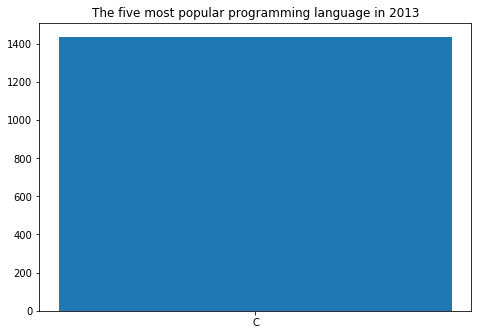

------------------------------------------------------------------------
Year 2014
Reading csv file ': ./Dataset/2014 Stack Overflow Survey Responses.csv ...
Analysing field Which of the following languages or technologies have you used significantly in the past year?...
Parse language field...


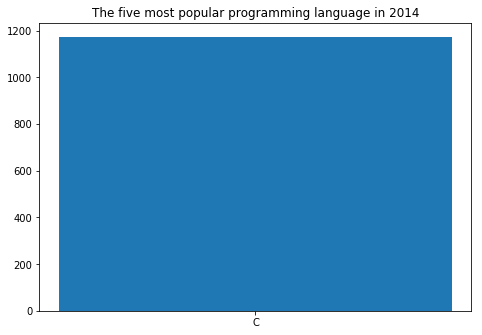

------------------------------------------------------------------------
Year 2015
Reading csv file ': ./Dataset/2015 Stack Overflow Developer Survey Responses.csv ...
Analysing field Select all that apply.1...
Parse language field...


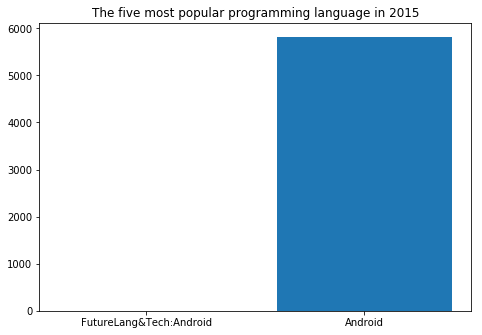

------------------------------------------------------------------------
Year 2016
Reading csv file ': ./Dataset/2016 Stack Overflow Survey Responses.csv ...
The field is empty! 
------------------------------------------------------------------------
Year 2017
Reading csv file ': ./Dataset/survey_results_public_2017.csv ...
Analysing field HaveWorkedLanguage...
Parse language field...


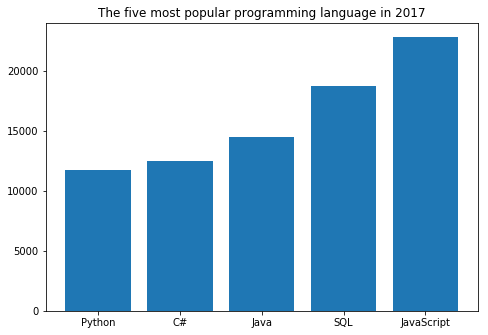

------------------------------------------------------------------------
Year 2018
Reading csv file ': ./Dataset/survey_results_public_2018.csv ...
Analysing field LanguageWorkedWith...
Parse language field...


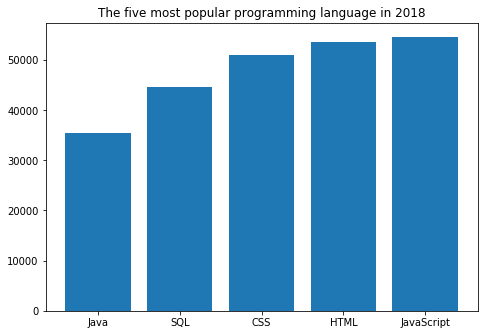

------------------------------------------------------------------------
Year 2019
Reading csv file ': ./Dataset/survey_results_public_2019.csv ...
Analysing field LanguageWorkedWith...
Parse language field...


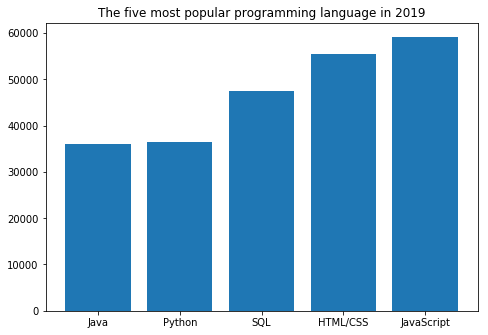

------------------------------------------------------------------------
Year 2020
Reading csv file ': ./Dataset/survey_results_public_2020.csv ...
Analysing field LanguageWorkedWith...
Parse language field...


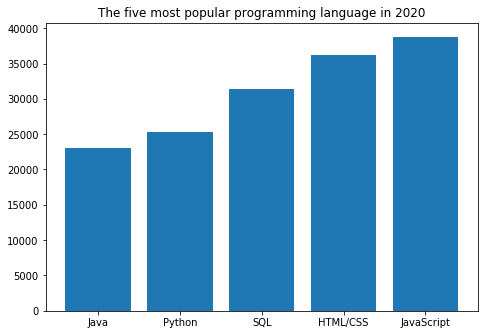

In [130]:
years = [2017]
years = np.linspace(2011,2020,2020-2011+1,dtype = 'int') # List with all the years under analysis
for year in years:
    idx =  year - 2011;
    print('------------------------------------------------------------------------')
    print('Year ' + str(year))
    print("Reading csv file ': " + PathName  + FileNames[idx] + '.csv ...')
    df = pd.read_csv(PathName  + FileNames[idx] + '.csv',engine='python') # TODO: Uncomment it later
    if Language_field[idx] != '':
        print('Analysing field ' + Language_field[idx] + '...')
        language = df[Language_field[idx]]
        language = show_top_five_programming_languages(language,year,show_results = True)
    else:
        language = []
        print('The field is empty! ')
            


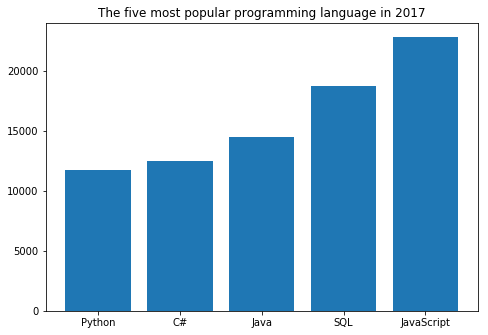

In [125]:
# Identify the type of languages used in a year
All_languages = []
for sublist in language.str.split(";",expand=False).values.tolist():
    for item in sublist:
        All_languages.append(item.replace(" ", ""))

language_type = list(set(All_languages)) # Select unique type of languages

# Calculate the frequency of each type of language
language_frequency =[]
for language_type_ in range(len(language_type)):
    language_frequency.append(All_languages.count(language_type[language_type_]))


# Sort in decreasing order the most used programming language
index_sort = np.argsort(language_frequency)
index_sort
language_type_sorted = []
language_frequency_sorted = []
for index in index_sort:
    language_type_sorted.append(language_type[index])
    language_frequency_sorted.append(language_frequency[index])

# Show frequency bar for the top 5
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(language_type_sorted[-5:],language_frequency_sorted[-5:])
plt.title('The five most popular programming language in ' + str(year))
plt.show()



In [120]:
index_sort
language_type_sorted = []
for index in index_sort:
    language_type_sorted.append(language_type[index])
language_type_sorted

['Hack',
 'Julia',
 'Dart',
 'CommonLisp',
 'Erlang',
 'Smalltalk',
 'Elixir',
 'Clojure',
 'Rust',
 'F#',
 'Haskell',
 'Lua',
 'VisualBasic6',
 'CoffeeScript',
 'Groovy',
 'Scala',
 'Go',
 'Matlab',
 'VBA',
 'Perl',
 'R',
 'Assembly',
 'VB.NET',
 'Objective-C',
 'Swift',
 'Ruby',
 'TypeScript',
 'C',
 'C++',
 'PHP',
 'Python',
 'C#',
 'Java',
 'SQL',
 'JavaScript']

In [51]:


FormalEducation_exist = []
Features = pd.DataFrame()
for year in years:
    print(PathName  + FileNames[2020 - year] + '.csv')
    df = pd.read_csv(PathName  + FileNames[2020 - year] + '.csv',engine='python')
    try:
        df.FormalEducation
        print(df.columns)
        FormalEducation_exist.append(True)
        
    except: 
        FormalEducation_exist.append(False)
        print(df.columns)



./Dataset/2011 Stack Overflow Survey Results.csv
Index(['What Country or Region do you live in?',
       'Which US State or Territory do you live in?', 'How old are you?',
       'How many years of IT/Programming experience do you have?',
       'How would you best describe the industry you work in?',
       'Which best describes the size of your company?',
       'Which of the following best describes your occupation?',
       'How likely is it that a recommendation you make will be acted upon?',
       'What is your involvement in purchasing? You can choose more than 1.',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14',
       'What types of purchases are you involved in?', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'What is your budget for outside expenditures (hardware, software, consulting, etc) for 2011?',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'U

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)
./Dataset/survey_results_public_2018.csv
Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'Exercise', 'Gender', 'SexualOrientation', 'EducationParents',
       'RaceEthnicity', 'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong',
       'SurveyEasy'],
      dtype='object', length=129)
./Dataset/survey_results_public_2019.csv
Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 

In [35]:
FormalEducation_exist

[False, False, False, False, False, False, True, True, False, False]

Now, it is defined the function _clean_data_ to clean up the dataset.

In [43]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop all the rows with no salaries
    df = df.dropna(subset = ['Salary'], axis = 0)

   
    # Create y as the Salary column
    y = df['Salary']
    
    # Drop the Salary, Respondent, and the ExpectedSalary columns from X
    df = df.drop(['Salary','Respondent','ExpectedSalary'], axis=1)
    
    # For each numeric variable in X, fill the column with the mean value of the column.
    num_vars = df.select_dtypes(include = ['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)

    # Create dummy columns for all the categorical variables in X, drop the original columns
    cat_vars = df.select_dtypes(include = ['object']).copy().columns
    for cols in cat_vars:
        df = pd.concat([df.drop(cols,axis = 1),pd.get_dummies(df[cols], prefix=cols, prefix_sep='_', drop_first=True)],axis = 1)

    X = df
    
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)  